
# Project: Investigate a TMDB movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



### Dataset decscription
This is the TMDB Movies dataset containing 10862 entries of different movies and different features. We have 21 columns in the dataset.
Columns of the dataset:

id                        Movie Id
imdb_id                  Movie Id on IMDB
popularity              an indication of the movie rating and populairt
budget                    in dollars
revenue                   in dollars
original_title           name of the movie
cast                     main actors
homepage                  link to the movie page
director                 who directed the movei
tagline                  famous tags 
keywords                 main keywords
overview                 a summary of the story
runtime                   how long in minutes 
genres                   which genra(action, adventure, romance, etx)
production_companies     which company produced it
release_date             when was it released
vote_count                how many votes given
vote_average            average rating of the votes
release_year              year it was released on
budget_adj              same as budject- adjusted for inflation

revenue_adj              same as revenue- adjusted for inflation

I aim to investigate the relation between different features and the popularity (dependent variable) of the movie
,hence specific features like title, homepage link, imdbid, etc because they are categorical features with unique value to each example.


In [5]:

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [6]:
# Load your data and print out a few lines.
#innspect data
#   instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
print(df.dtypes)

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
(df.head())


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


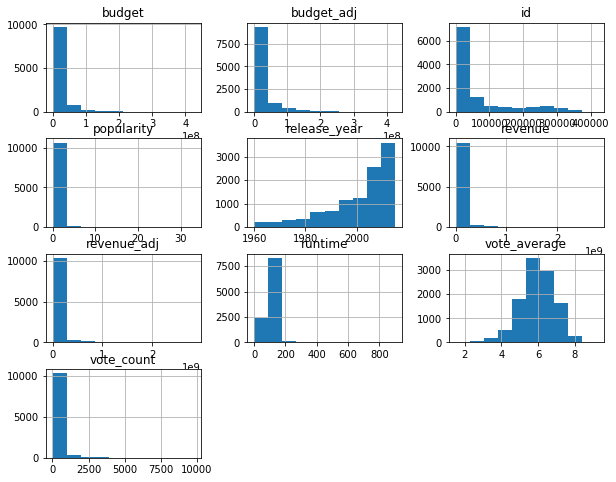

In [9]:
# histogram of the numerical data
df.hist(figsize=(10,8));

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


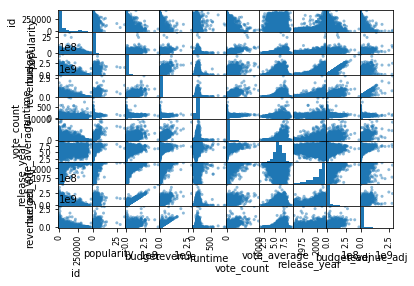

In [10]:
pd.scatter_matrix(df);

In [11]:
# missing data in each column
for col in df.columns:
    print('col %s  with dtype %s has na values %d :'% (col,df[col].dtype, df[col].isna().sum()))

col id  with dtype int64 has na values 0 :
col imdb_id  with dtype object has na values 10 :
col popularity  with dtype float64 has na values 0 :
col budget  with dtype int64 has na values 0 :
col revenue  with dtype int64 has na values 0 :
col original_title  with dtype object has na values 0 :
col cast  with dtype object has na values 76 :
col homepage  with dtype object has na values 7930 :
col director  with dtype object has na values 44 :
col tagline  with dtype object has na values 2824 :
col keywords  with dtype object has na values 1493 :
col overview  with dtype object has na values 4 :
col runtime  with dtype int64 has na values 0 :
col genres  with dtype object has na values 23 :
col production_companies  with dtype object has na values 1030 :
col release_date  with dtype object has na values 0 :
col vote_count  with dtype int64 has na values 0 :
col vote_average  with dtype float64 has na values 0 :
col release_year  with dtype int64 has na values 0 :
col budget_adj  with d

In [12]:
# summary of numeric features
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
# check duplicates
df.duplicated().sum()

1



### Data Cleaning (Drop irrelevant categorical data, fill null values, convert date into continous values and duplicates!)

In [14]:
#drop irrelevant features (categorical)
df.drop(['imdb_id','homepage','id','original_title','cast','director','tagline'],inplace=True,axis=1)

In [15]:
df.drop(['overview','keywords'],inplace=True,axis=1)

In [16]:
df.drop(['genres','production_companies'],inplace=True,axis=1)

In [17]:
df.drop(['release_date'],inplace=True,axis=1)

In [18]:
df.head()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
#replace nan with mean for numerical values
for col in df.columns:
    if df[col].dtype != 'object':
        df[col]=df[col].fillna(df[col].mean())

In [20]:
# check na values again 
for col in df.columns:
    print('col %s  with dtype %s has na values %d :'% (col,df[col].dtype, df[col].isna().sum()))

col popularity  with dtype float64 has na values 0 :
col budget  with dtype int64 has na values 0 :
col revenue  with dtype int64 has na values 0 :
col runtime  with dtype int64 has na values 0 :
col vote_count  with dtype int64 has na values 0 :
col vote_average  with dtype float64 has na values 0 :
col release_year  with dtype int64 has na values 0 :
col budget_adj  with dtype float64 has na values 0 :
col revenue_adj  with dtype float64 has na values 0 :


In [21]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [22]:
df.head() # check the cleaned dataset.

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,2947,7.3,2015,1.747999e+08,1.385749e+09


In [23]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (relation between other vairables and popularity)

In [24]:
def get_unique_vals(df):
    for col in df.columns:
        print("unique values for col %s "%(col))
        print(len(df[col].unique()))


In [33]:
def plot_correlations(df,feat):
    for col in df.columns:
        plt.scatter(df[col],df[feat])
        plt.xlabel(col)
        plt.ylabel(feat)
        plt.title('corelation between %s and %s'%(col,feat))
        plt.show()

In [25]:
# unique value counts for each column
get_unique_vals(df)

unique values for col popularity 
10814
unique values for col budget 
557
unique values for col revenue 
4702
unique values for col runtime 
247
unique values for col vote_count 
1289
unique values for col vote_average 
72
unique values for col release_year 
56
unique values for col budget_adj 
2614
unique values for col revenue_adj 
4840


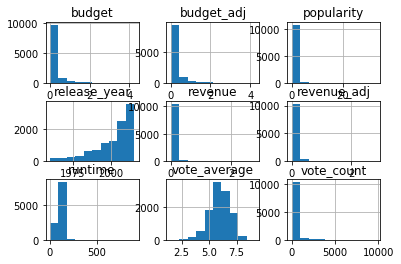

In [26]:
df.hist();

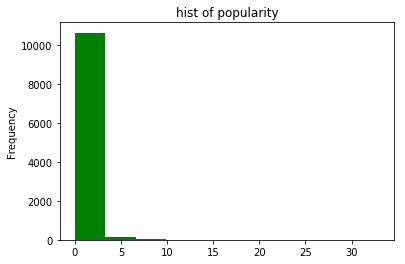

In [48]:
#see where the majority of populaity values lie in
df.popularity.plot(color='green', kind='hist', title='hist of popularity');

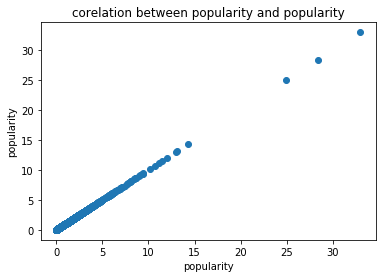

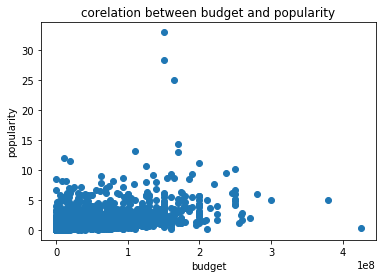

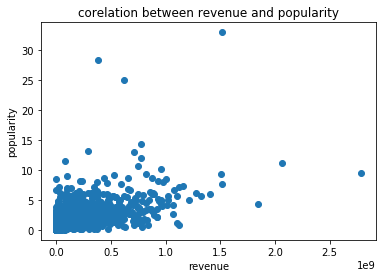

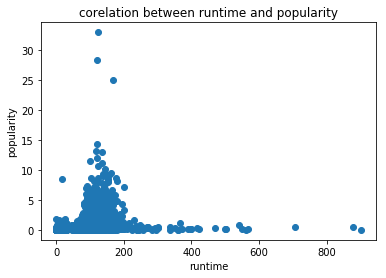

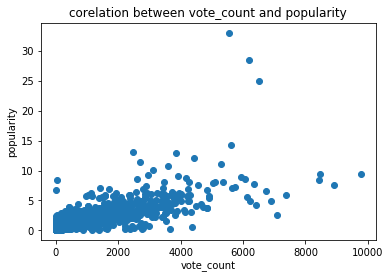

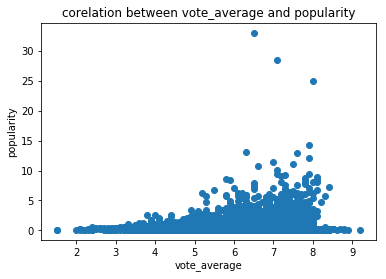

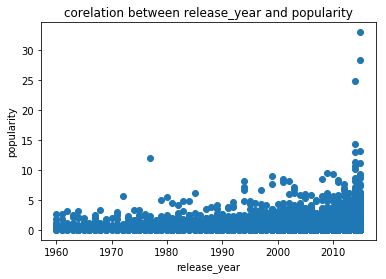

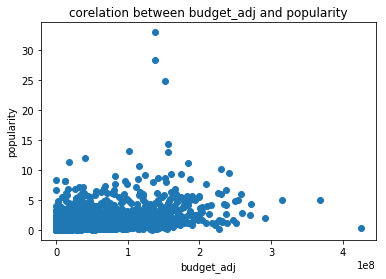

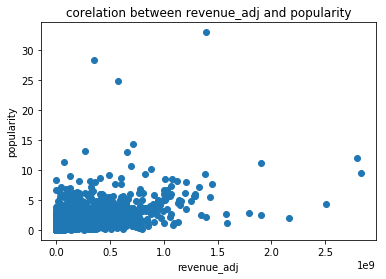

In [34]:
# plot relation of popularity with every feature
plot_correlations(df,'popularity')

### Research Question 2  (Revenue of movie vs other variables!)

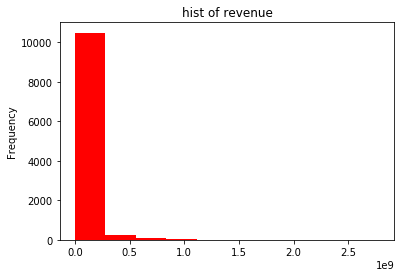

In [47]:
# see the range of revenue values
df.revenue.plot(color='red', kind='hist', title='hist of revenue');

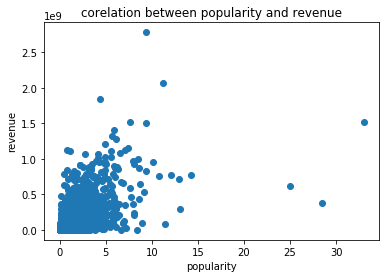

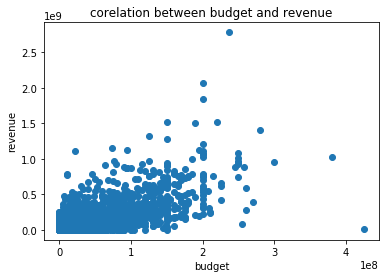

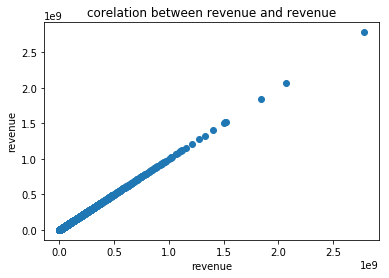

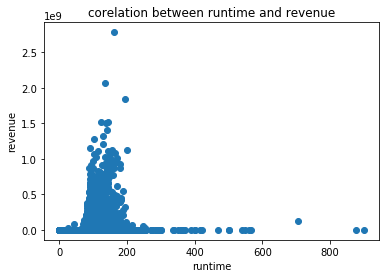

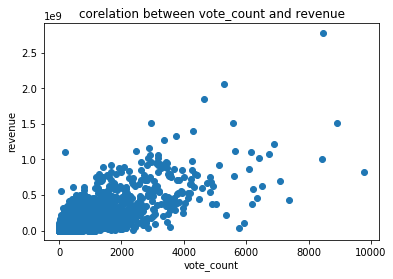

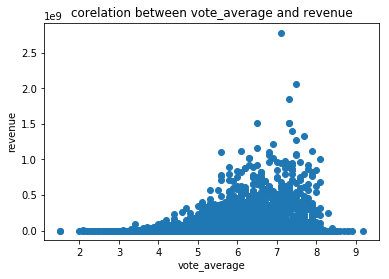

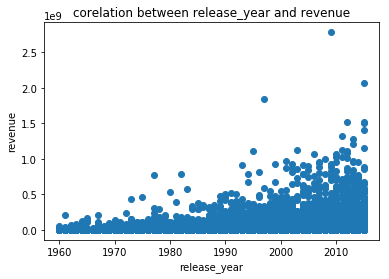

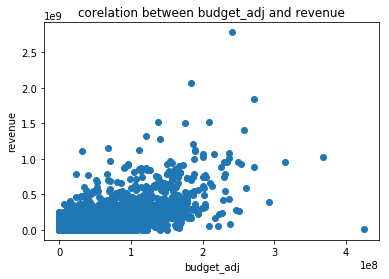

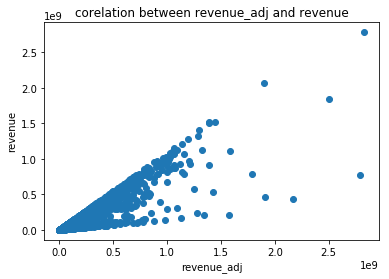

In [35]:
# plot relation of popularity with every feature
plot_correlations(df,'revenue')

In [55]:
def plot_single_cor(df,col,feat):
    
    plt.scatter(df[col],df[feat],c=np.random.rand(df.shape[0]))
    plt.xlabel(col)
    plt.ylabel(feat)
    plt.title('corelation between %s and %s'%(col,feat))
    plt.show()

<a id='conclusions'></a>
## Conclusions
The limitations of the analysis provided below are:
1- I used the mean to replace every nan values while it might have been better to replace it with the mode or by regression. This need further investigation, but I used the mean since it is a popular choice.
2- I did not include any of  the categorical data (e.g. production company, name,genre)in my analysis; this was done under the assumption that they have very unique values for each one and it is unlikely for them to have corelation with revenue and popularity. This assumption was in need to be investigated more and it has a requirment of many data processing to confirm or deny this assumptiom.
3- To confirm the corelations more, a corelation cooficient would have been better to report; however, I beleive the trends are somehow clear and there was no need for them.

Note: budget_adj and revenue_adj are not taken into consideration since they are considere a repetition to budget and reveneue but recalculated in a different way to accomodate for inflation.



### Conclusions about the popularity variable
Most of the values of popularity lie in the range of less than 5 which should be taken into consideration to remove the outliers while drawing conclusions.

From the grpahs above, the popularity variable seems to have a positive corelation with vote count  and vote average, and a negative corelation with run time. Most of the movies with high popularity have a run time less than 200 minutes and above about 100 minutes. The other variables like (budget and revenue) don't have clear colreation with the movie's popularity which was suprising. The coorelation of popularity with vote count, vote average, and runtime is shown in the cells below.

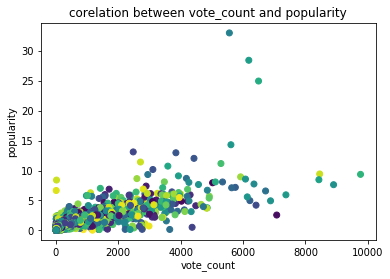

In [56]:
plot_single_cor(df,'vote_count','popularity')

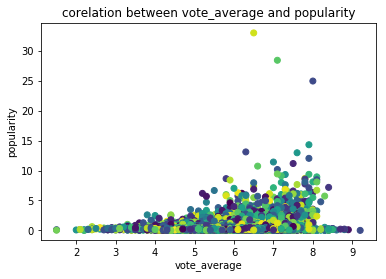

In [59]:
plot_single_cor(df,'vote_average','popularity')

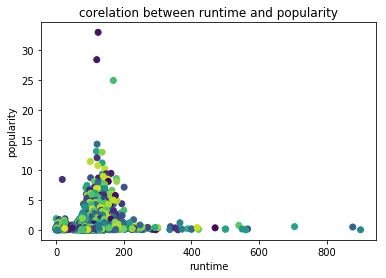

In [61]:
plot_single_cor(df,'runtime','popularity')

### Conclusions about the revenue variable
Most of the values of revenue lie in the range of less than 0.5e9. which should be taken into consideration to remove the outliers while drawing conclusions.

From the grpahs above, the revenue variable seems to have a positive corelation with vote count  and vote average and slight poisitive corelation with budget. It has a negative corelation with run time. Most of the movies with high revenue have a run time less than 200 minutes and above about 50 minutes. The other variables like (popularity) don't have clear colreation with the movie's popularity which was suprising.The coorelation of revenue with budget, vote count, and runtime is shown in the cells below.

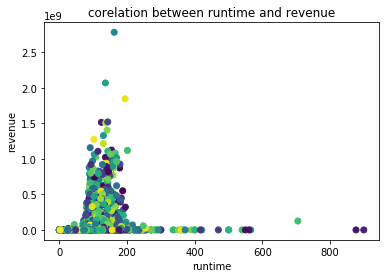

In [62]:
plot_single_cor(df,'runtime','revenue')

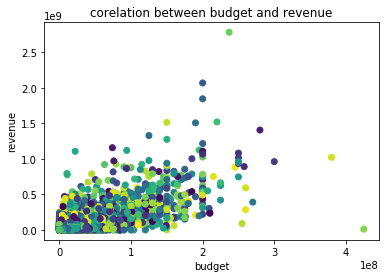

In [63]:
plot_single_cor(df,'budget','revenue')

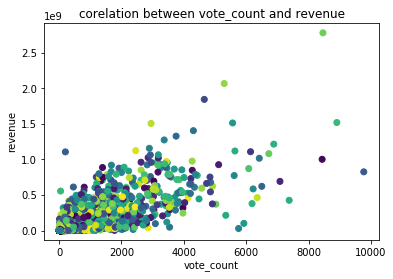

In [64]:
plot_single_cor(df,'vote_count','revenue')

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0